In [63]:
import os
import pandas as pd
os.chdir(r"C:\Users\user\jupyter\python\preprocessing\데이터")

In [64]:
df = pd.read_csv("판매실적통합본.csv", engine = "python")
print(df.shape)
df.head()
# df['지역 구분'].unique()

(115026, 11)


,년도(year),월(month),분기(4),일자(day),주차별 편중도,출하일,대리점,지역 구분,내수/수출 구분,제품군,수량
0,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,12
1,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,4
2,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,1
3,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 5,122
4,2016,1,1분기,4,상,2016-01-04,대리점 6,국내,내수,제품 1,20


In [6]:
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (40, 15)

In [ ]:
# 지금 그리고 싶은 것은 분기와 대리점에 따른 수량의 합계를 구하고자 한다. 년도별 분기로 분할. 

In [4]:
'1' + '2'

'12'

In [19]:
# 년도 - 분기를 잇는 새로운 변수 생성
df['분기'] = df['년도(year)'].astype(str) + '-' + df['분기(4)'].astype(str)
df['분기'].unique()

array(['2016-1분기', '2016-2분기', '2016-3분기', '2016-4분기', '2017-1분기',
       '2017-2분기', '2017-3분기', '2017-4분기', '2018-1분기', '2018-2분기',
       '2018-3분기', '2018-4분기', '2019-1분기', '2019-2분기', '2019-3분기'],
      dtype=object)

In [21]:
grouped_df = df.groupby(['분기', '대리점'], as_index = False)['수량'].sum()
grouped_df
# multi index는 다루기가 까다롭다. 
# df.pivot_table(index = ['분기', '대리점'], values = ['수량'], aggfunc = 'sum')


,분기,대리점,수량
0,2016-1분기,대리점 1,39934
1,2016-1분기,대리점 10,4525
2,2016-1분기,대리점 2,19787
3,2016-1분기,대리점 3,24723
4,2016-1분기,대리점 4,9010
...,...,...,...
145,2019-3분기,대리점 5,82314
146,2019-3분기,대리점 6,6252
147,2019-3분기,대리점 7,30405
148,2019-3분기,대리점 8,10096


In [55]:
len(grouped_df['분기'].unique()) == len(range(len(grouped_df['분기'].unique()))) # 15개가 존재함. 
sorted(grouped_df['대리점'].unique(),  key = lambda x : x[5:])
# 순서대로 나열하기. label에서 깔끔하게 보이게 하기 위해서. 

['대리점 1',
 '대리점 2',
 '대리점 3',
 '대리점 4',
 '대리점 5',
 '대리점 6',
 '대리점 7',
 '대리점 8',
 '대리점 9',
 '대리점 10']

#### pyplot을 이용한 그래프 그리기

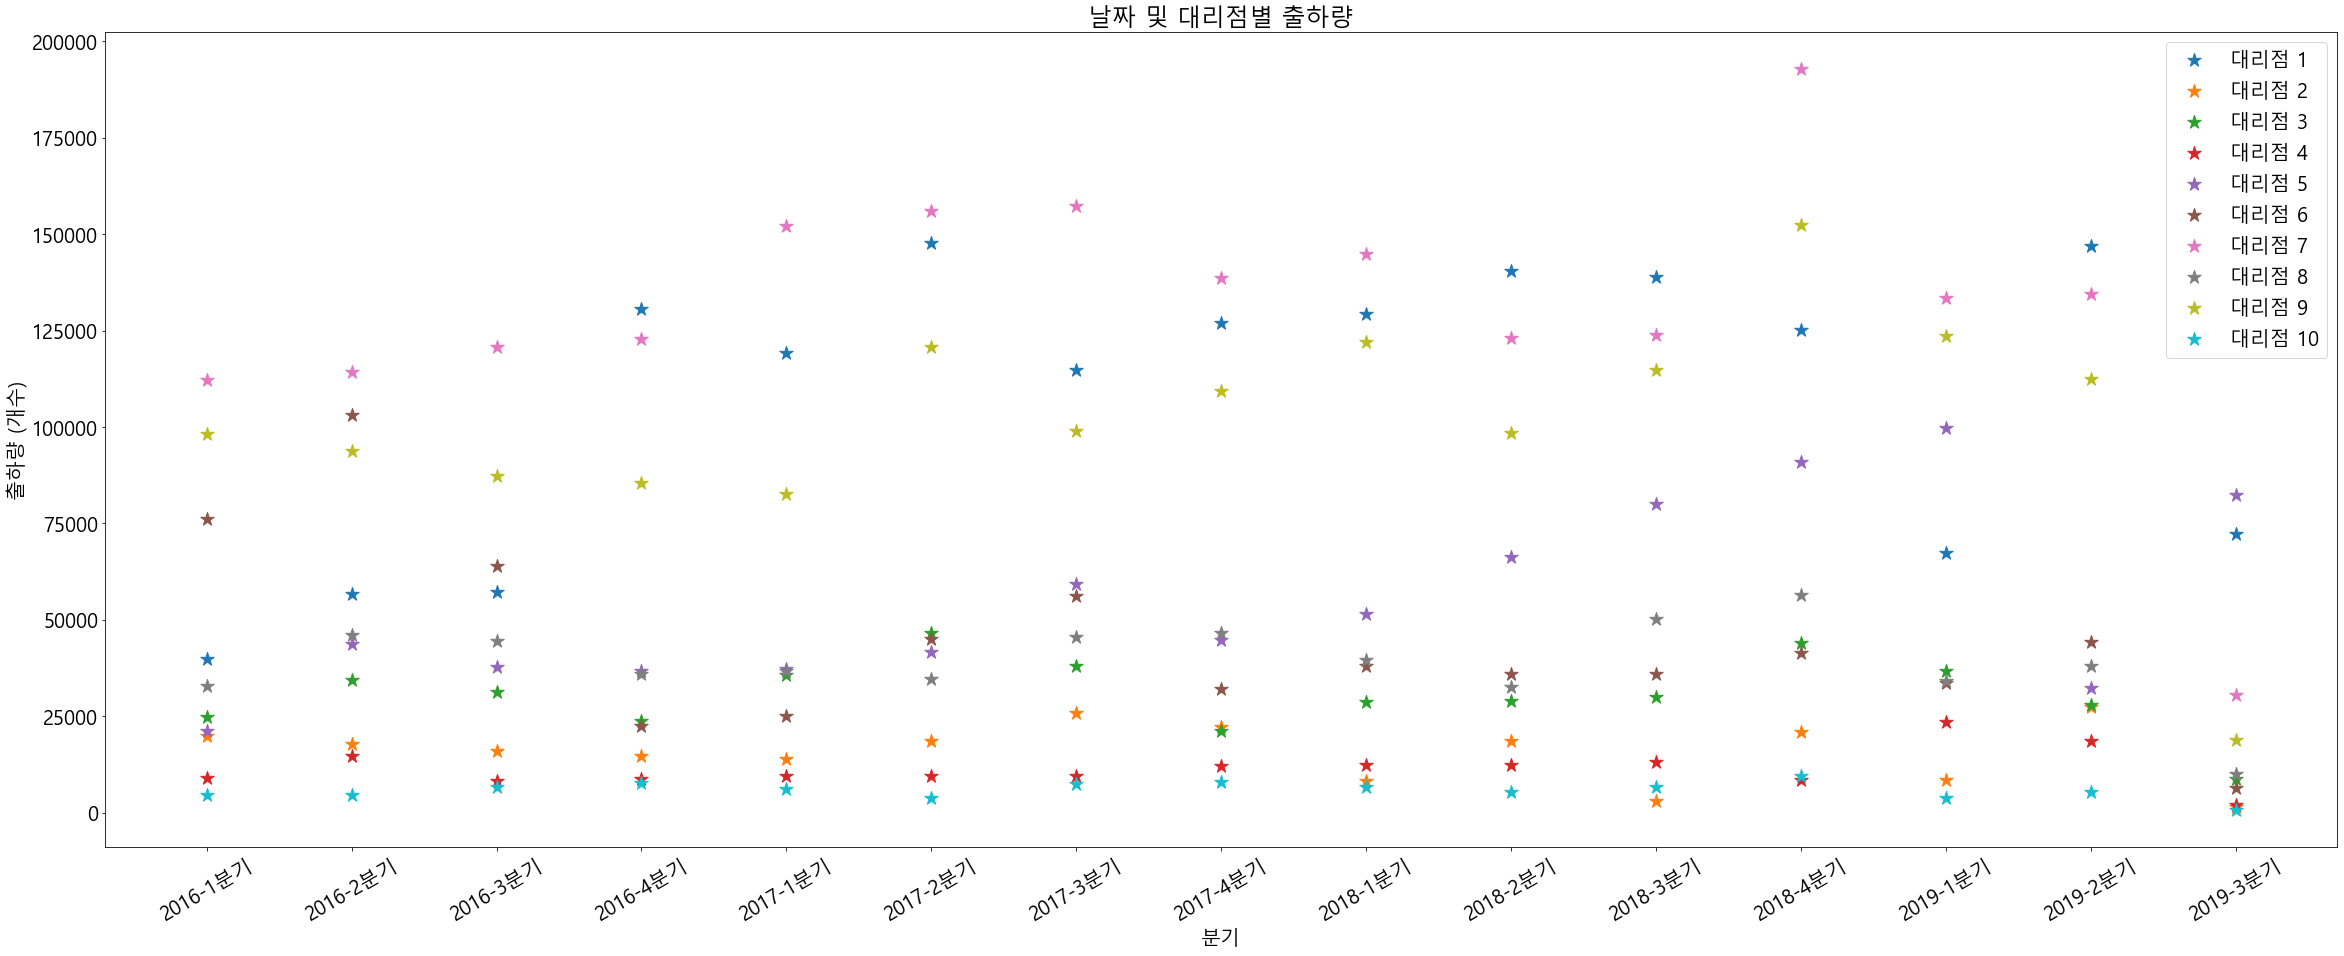

In [61]:
# 그래프 기본 설정
plt.title("날짜 및 대리점별 출하량")
plt.xlabel("분기")
plt.ylabel("출하량 (개수)")

xtick_range = range(len(grouped_df['분기'].unique()))
xtick_label = grouped_df['분기'].unique()
plt.xticks(xtick_range, xtick_label, rotation = 30)
# 한가지 궁금한 점은 길이가 같기 때문에 이렇게 잘 나타내지는게 아닐까. 
for agent in sorted(grouped_df['대리점'].unique(),  key = lambda x : x[5:]):
    cond = grouped_df['대리점'] == agent
    plt.scatter(grouped_df.loc[cond]['분기'], grouped_df.loc[cond]['수량'], s = 200, marker = '*', label = agent)
    
plt.legend()
# 대리점 별로 구분해야 하는데 지금은 대리점별로 구분이 불가능한 상태이다. 이걸 어떻게 설정해야 하는가? 대리점별 label을 다르게 설정해야 한다. 

# 대리점 7이 매 분기 매우 출하량이 높다는 것을 알 수 있다.

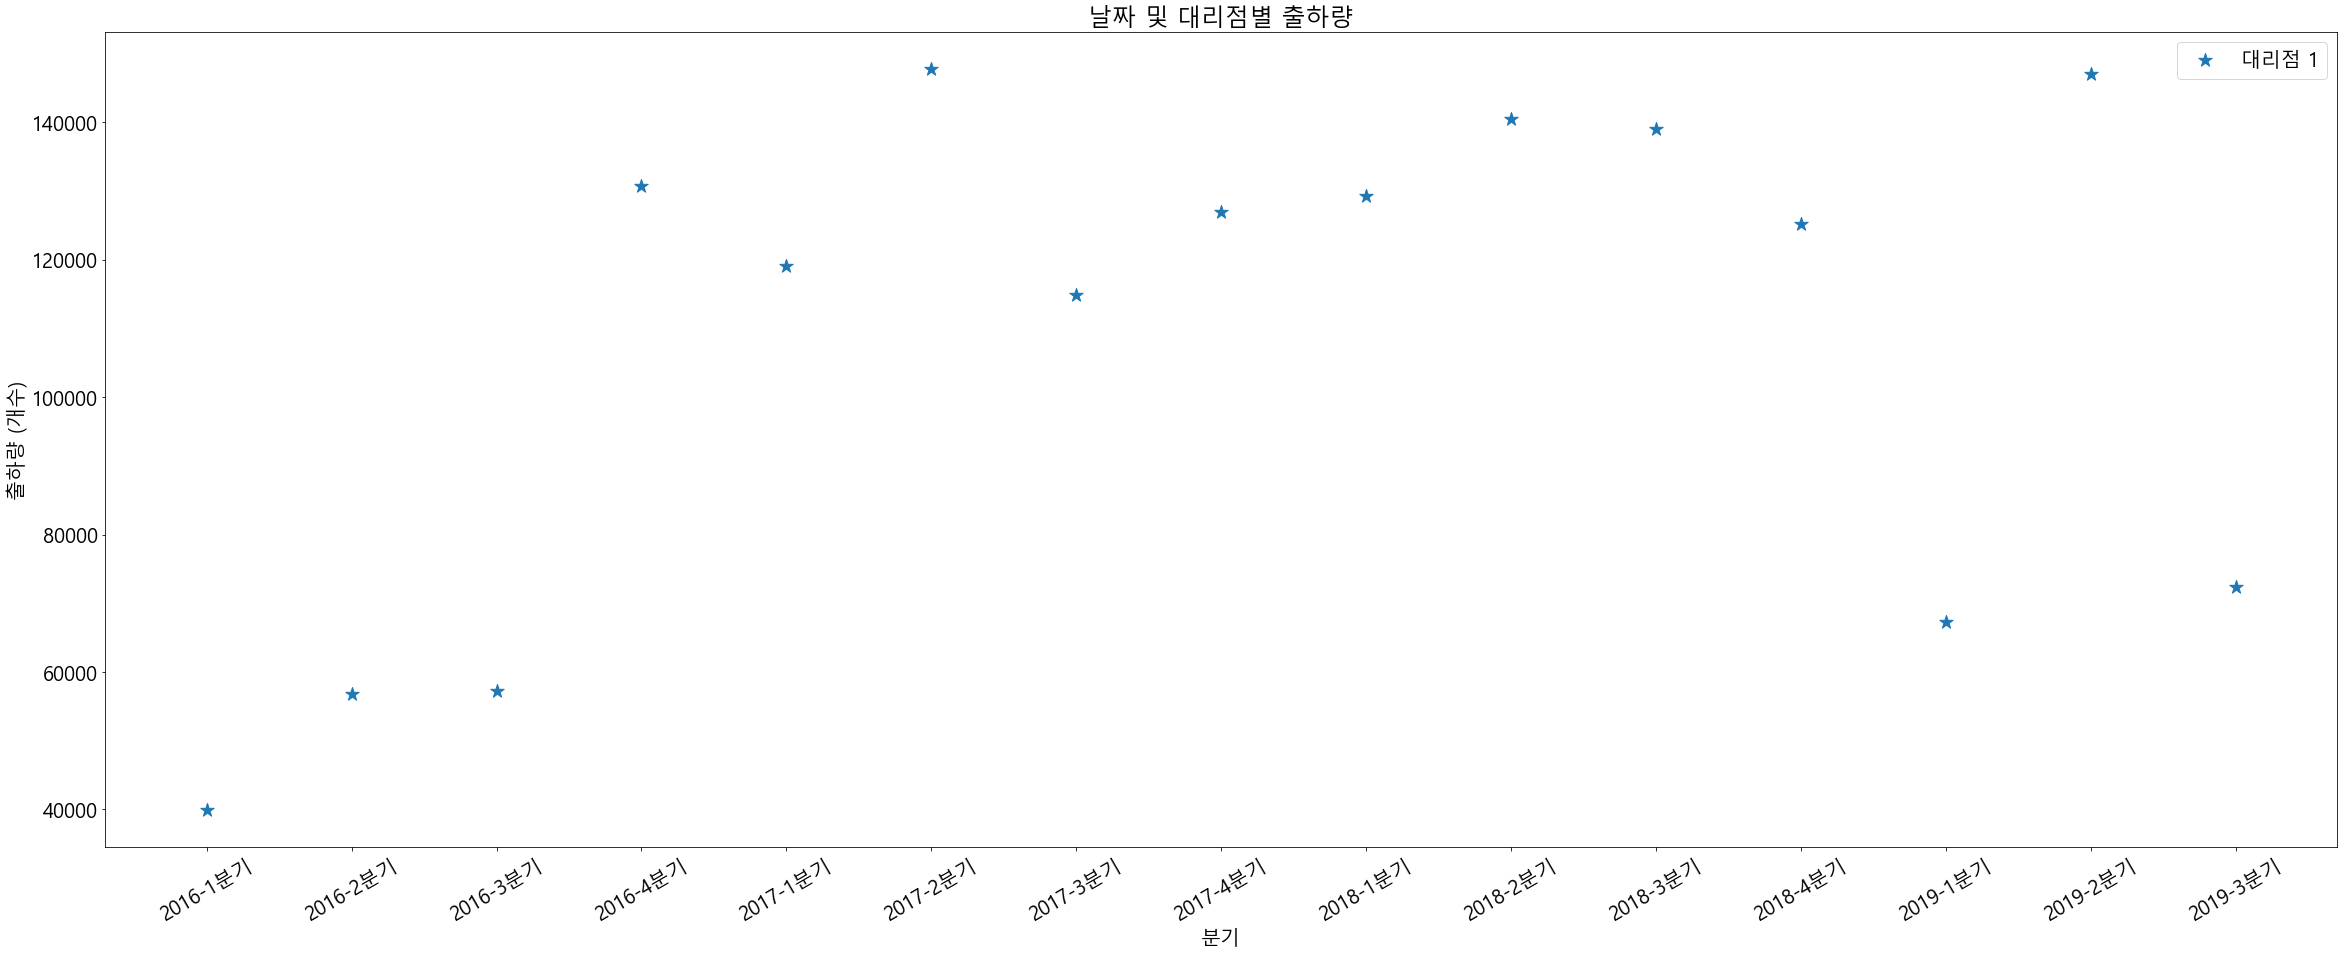

In [69]:
plt.title("날짜 및 대리점별 출하량")
plt.xlabel("분기")
plt.ylabel("출하량 (개수)")

xtick_range = range(len(grouped_df['분기'].unique()))
xtick_label = grouped_df['분기'].unique()
plt.xticks(xtick_range, xtick_label, rotation = 30)
# 한가지 궁금한 점은 길이가 같기 때문에 이렇게 잘 나타내지는게 아닐까. 

cond = grouped_df['대리점'] == '대리점 1'
plt.scatter(grouped_df.loc[cond]['분기'], grouped_df.loc[cond]['수량'], s = 200, marker = '*', label = '대리점 1')
    
plt.legend()

In [68]:
grouped_df.loc[grouped_df['대리점'] == '대리점 1']['분기'] # 길이가 15
grouped_df.loc[grouped_df['대리점'] == '대리점 1']['수량']

0       39934
10      56799
20      57184
30     130682
40     119085
50     147784
60     114819
70     126994
80     129271
90     140480
100    138943
110    125215
120     67250
130    146956
140     72324
Name: 수량, dtype: int64

#### DataFrame을 이용하여 직접 그래프 그리기

In [16]:
grouped_df.head() 
# 대리점별로 데이터를 나누거나, pivot을 해야만 df.plot을 이용하기 적합해짐

,분기,대리점,수량
0,2016-1분기,대리점 1,39934
1,2016-1분기,대리점 10,4525
2,2016-1분기,대리점 2,19787
3,2016-1분기,대리점 3,24723
4,2016-1분기,대리점 4,9010


In [62]:
pivot_df = pd.pivot_table(data = grouped_df, values = '수량', index = '분기', columns = '대리점', aggfunc = 'sum')
pivot_df = pivot_df.add_suffix("_출하량") # 대리점명이 전부 컬럼으로 되기 때문에, suffix를 추가시킴

pivot_df

대리점,대리점 1_출하량,대리점 10_출하량,대리점 2_출하량,대리점 3_출하량,대리점 4_출하량,대리점 5_출하량,대리점 6_출하량,대리점 7_출하량,대리점 8_출하량,대리점 9_출하량
분기,,,,,,,,,,
2016-1분기,39934,4525,19787,24723,9010,21249,76005,112276,32743,98266
2016-2분기,56799,4519,17783,34247,14592,43818,103226,114176,46088,93726
2016-3분기,57184,6701,15878,31367,8300,37634,63977,120829,44548,87417
2016-4분기,130682,7704,14592,23857,8780,36622,22512,122822,35805,85516
2017-1분기,119085,6027,13951,35692,9375,37151,25148,152077,36627,82569
2017-2분기,147784,3780,18633,46604,9357,41749,45136,155935,34654,120782
2017-3분기,114819,7356,25919,37974,9397,59254,56074,157376,45479,98911
2017-4분기,126994,7853,22245,21024,11952,44728,31915,138685,46461,109366
2018-1분기,129271,6554,8176,28597,12280,51422,38133,144976,39479,121972


In [20]:
pivot_df['분기'] = list(range(len(pivot_df))) # x축에 쓰기 위해 임의의 변수를 생성함
pivot_df['분기'].head()

분기
2016-1분기    0
2016-2분기    1
2016-3분기    2
2016-4분기    3
2017-1분기    4
Name: 분기, dtype: int64

([<matplotlib.axis.XTick at 0x2c87f7104a8>,
 <a list of 15 Text xticklabel objects>)

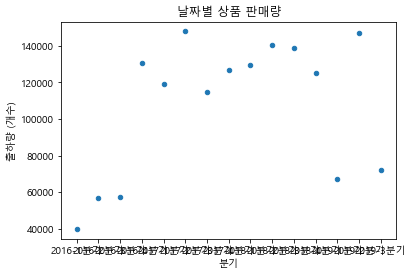

In [21]:
# 그래프 기본 설정
pivot_df.plot(kind = 'scatter', x = '분기', y = '대리점 1_출하량')
plt.title("날짜별 상품 판매량")
plt.xlabel("분기")
plt.ylabel("출하량 (개수)")

xtick_range = range(len(grouped_df['분기'].unique()))
xtick_label = grouped_df['분기'].unique()

plt.xticks(xtick_range, xtick_label)